In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue['Region'] = dengue['Region'].astype('category')

<h1>INSIGHT #1. Total Dengue Cases Per Year</h1> 

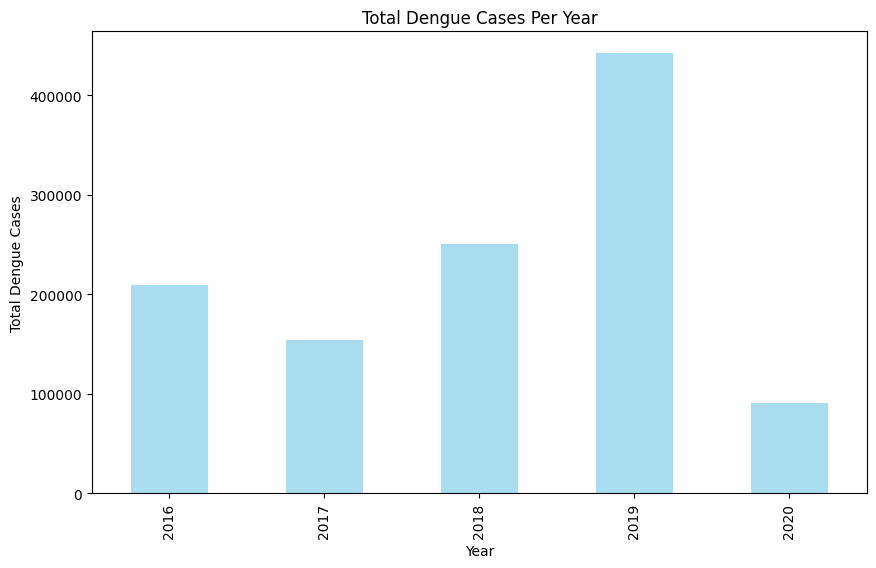

In [9]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()


plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Total Dengue Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()


<h1>INSIGHT #2. Total Dengue Deaths Per Year</h1> 

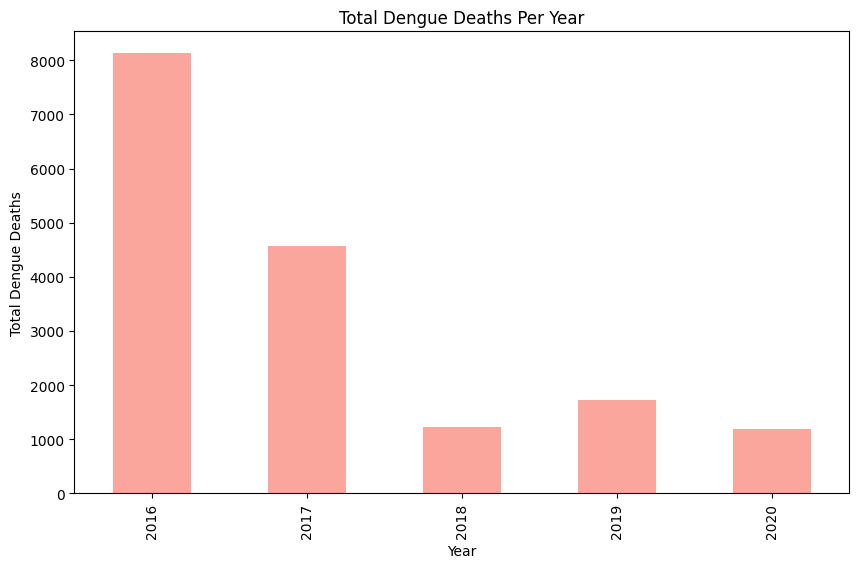

In [10]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()


plt.figure(figsize=(10, 6))
yearly_deaths.plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Total Dengue Deaths Per Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.show()


<h1>INSIGHT #3. Monthly Dengue Cases Trend (2016)
</h1> 

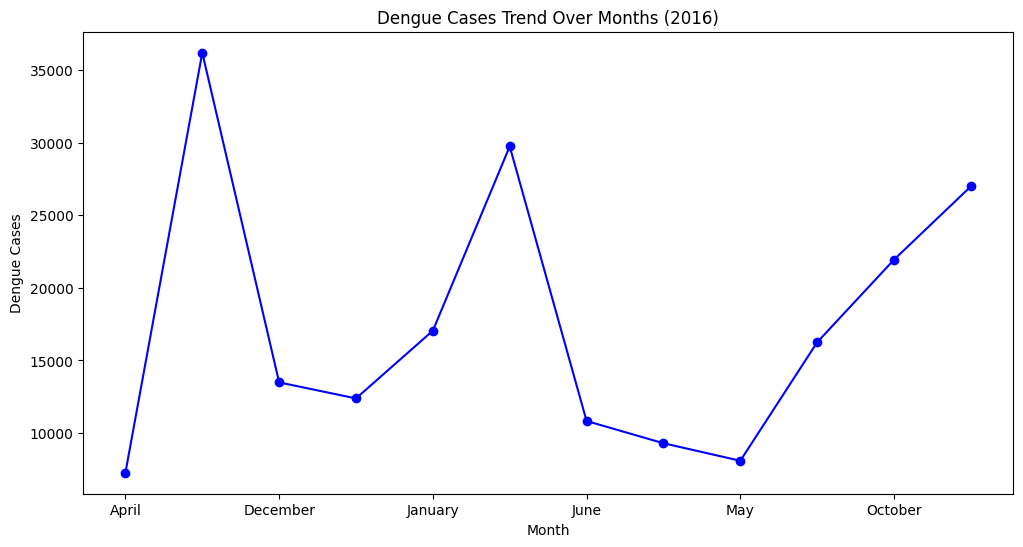

In [11]:
data_2016 = dengue[dengue['Year'] == 2016]

monthly_cases_2016 = data_2016.groupby('Month')['Dengue_Cases'].sum()


plt.figure(figsize=(12, 6))
monthly_cases_2016.plot(kind='line', marker='o', color='blue')
plt.title('Dengue Cases Trend Over Months (2016)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.show()


<h1>INSIGHT #4. Monthly Dengue Deaths Trend (2016)</h1> 

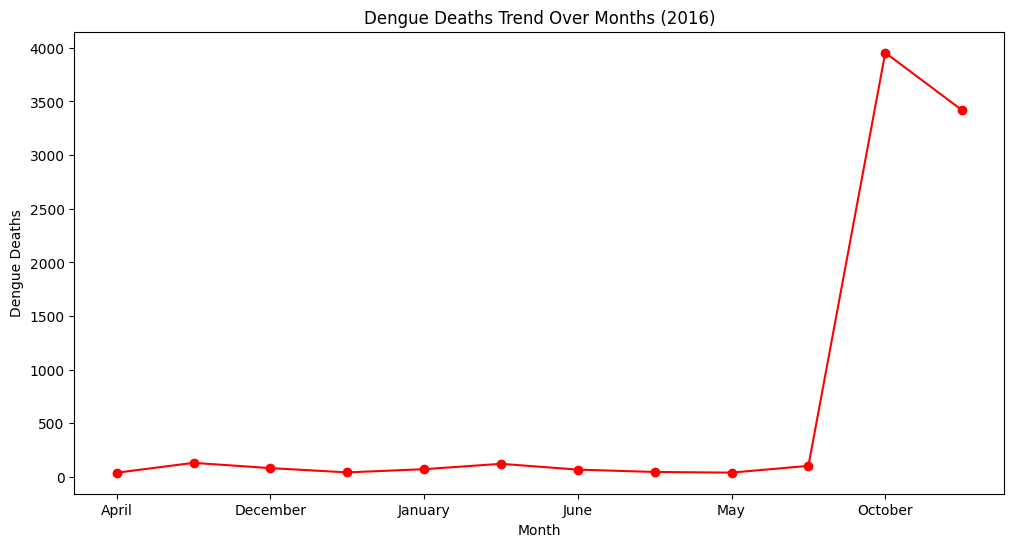

In [12]:
monthly_deaths_2016 = data_2016.groupby('Month')['Dengue_Deaths'].sum()

plt.figure(figsize=(12, 6))
monthly_deaths_2016.plot(kind='line', marker='o', color='red')
plt.title('Dengue Deaths Trend Over Months (2016)')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.show()

<h1>INSIGHT #5. Distribution of Dengue Cases by Region</h1> 

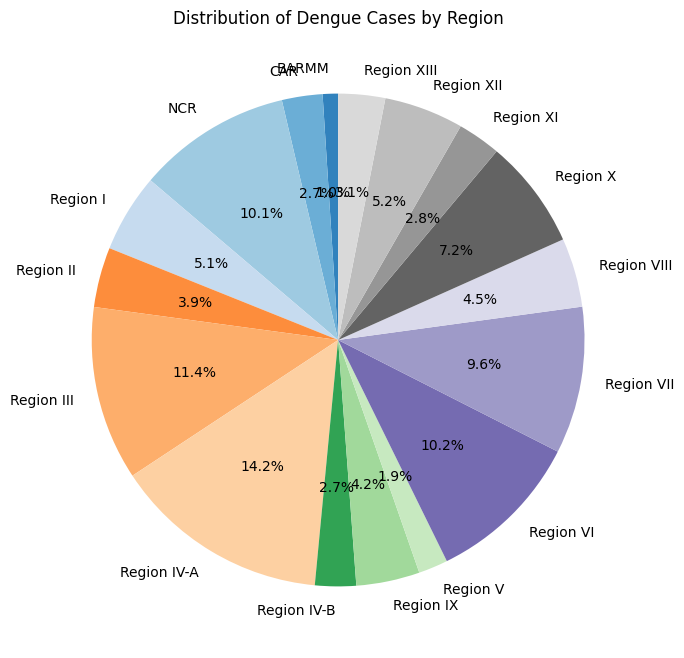

In [13]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(8, 8))
region_cases.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20c')
plt.title('Distribution of Dengue Cases by Region')
plt.ylabel('')
plt.show()

<h1>INSIGHT #6. Yearly Comparison of Dengue Cases (Region I vs Region II)</h1> 

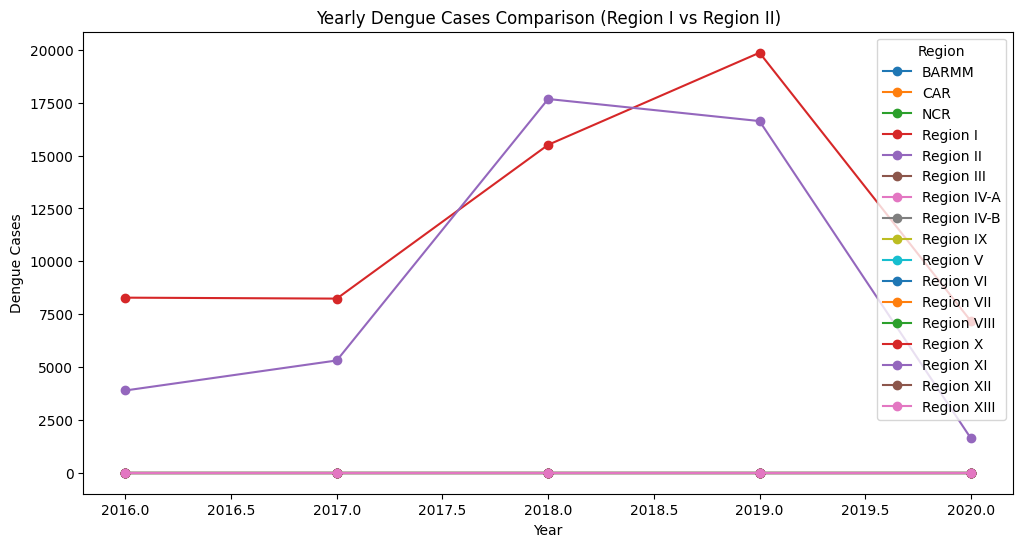

In [15]:
region_comparison = dengue[dengue['Region'].isin(['Region I', 'Region II'])]


comparison_data = region_comparison.groupby(['Year', 'Region'])['Dengue_Cases'].sum().unstack()

comparison_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Yearly Dengue Cases Comparison (Region I vs Region II)')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.legend(title='Region')
plt.show()

<h1>INSIGHT #7. Average Dengue Cases Per Month</h1> 

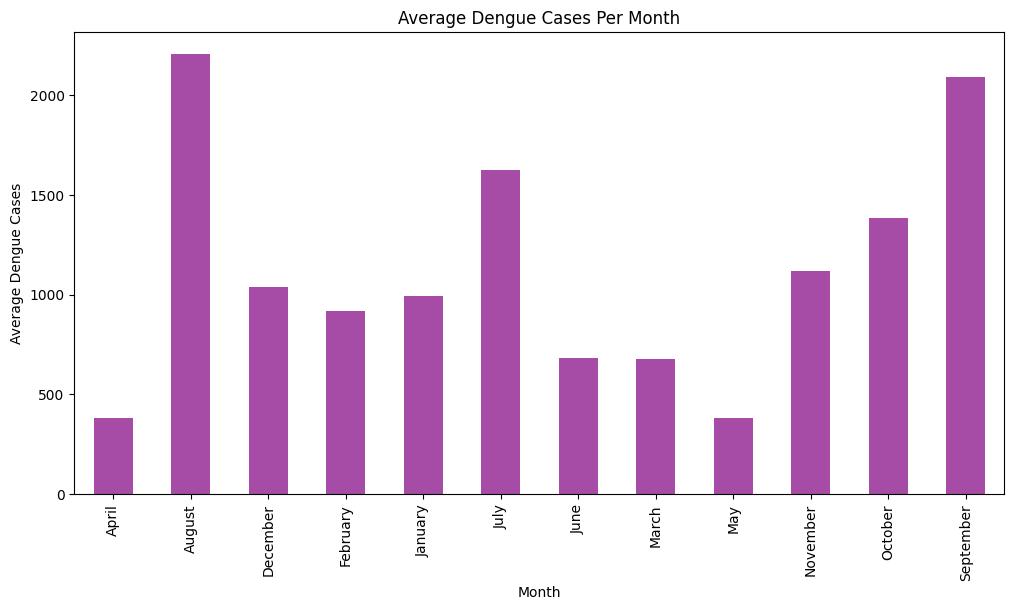

In [17]:
average_monthly_cases = dengue.groupby('Month')['Dengue_Cases'].mean()


average_monthly_cases.plot(kind='bar', color='purple', alpha=0.7, figsize=(12, 6))
plt.title('Average Dengue Cases Per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.show()

<h1>INSIGHT #8. Average Dengue Deaths Per Month</h1> 

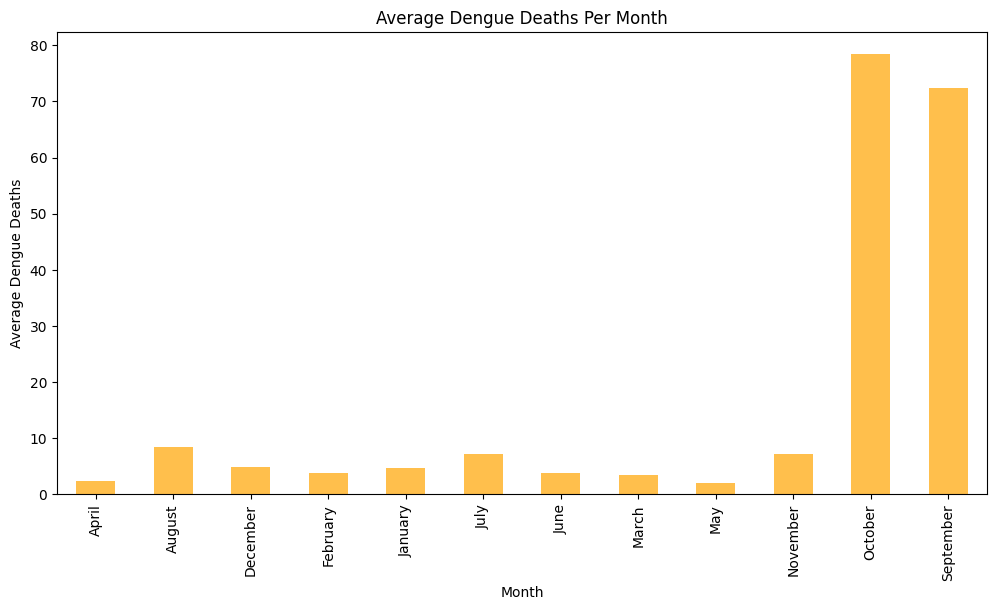

In [19]:
# Group by month and calculate mean deaths
average_monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean()

# Plot bar chart
average_monthly_deaths.plot(kind='bar', color='orange', alpha=0.7, figsize=(12, 6))
plt.title('Average Dengue Deaths Per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Deaths')
plt.show()

<h1>INSIGHT #9. Correlation Between Dengue Cases and Deaths</h1> 

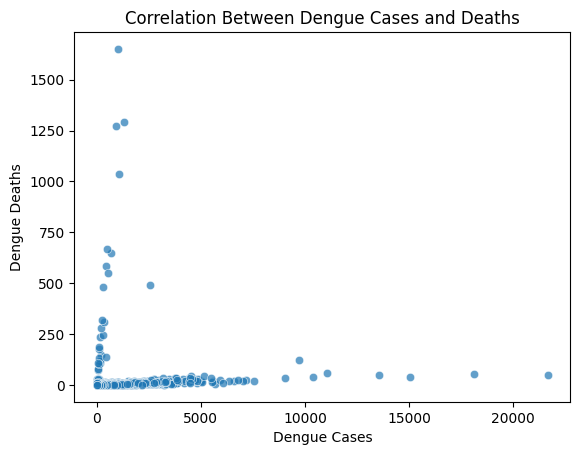

In [22]:
sns.scatterplot(x=dengue['Dengue_Cases'], y=dengue['Dengue_Deaths'], alpha=0.7)
plt.title('Correlation Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h1>INSIGHT #10. Top Regions with Highest Dengue Cases</h1> 

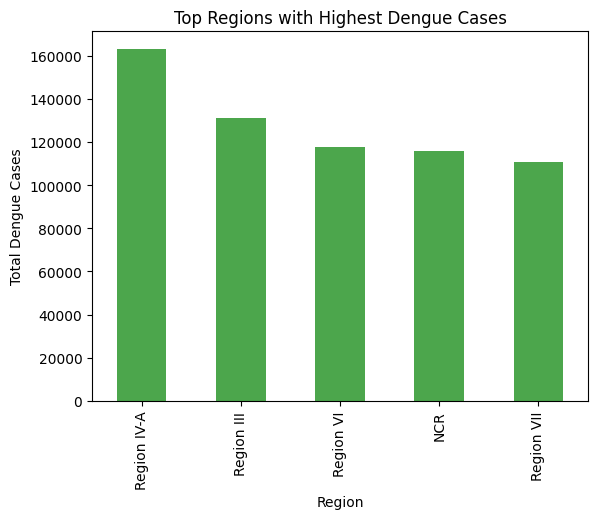

In [23]:
top_regions = region_cases.sort_values(ascending=False).head(5)


top_regions.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top Regions with Highest Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>INSIGHT #11. Regions with Highest Dengue Death Rates</h1> 

<Axes: xlabel='Region'>

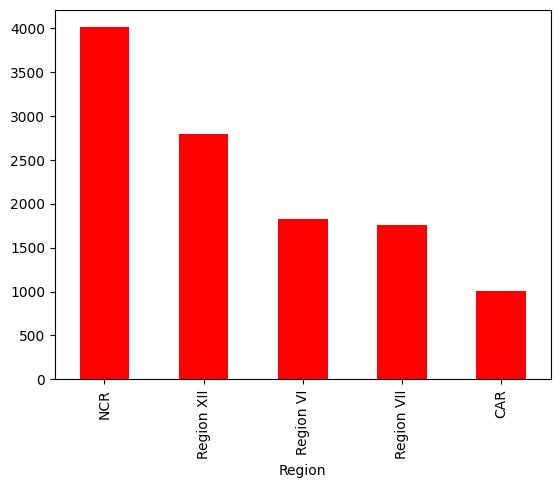

In [25]:
region_death_rates = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).head(5)

region_death_rates.plot(kind="bar",color="red")

<h1>INSIGHT #12. Monthly Dengue Cases Across All Years
</h1> 

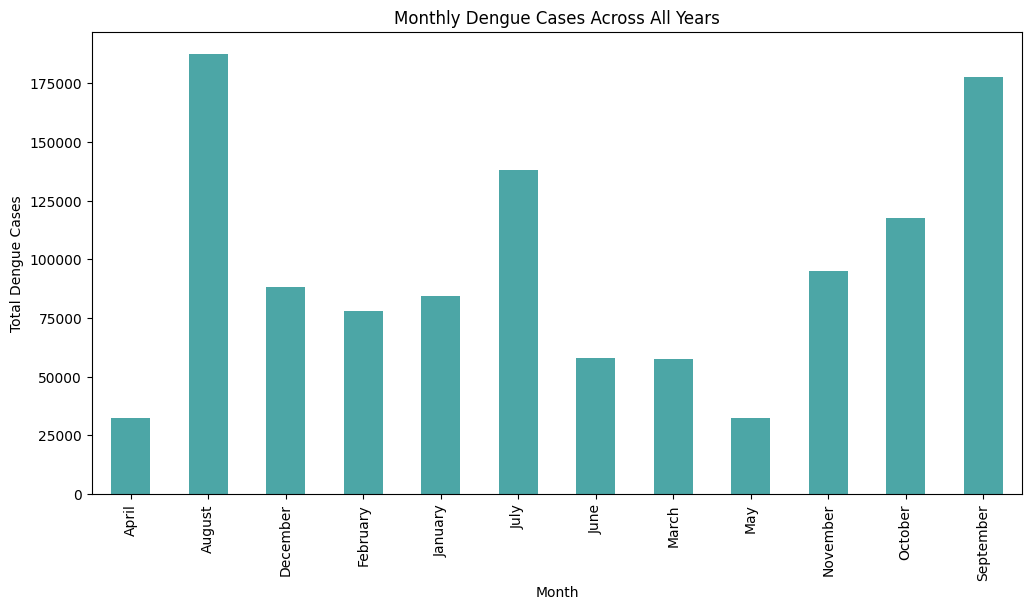

In [26]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_cases.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Monthly Dengue Cases Across All Years')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>INSIGHT #13. Monthly Dengue Deaths Across All Years</h1> 

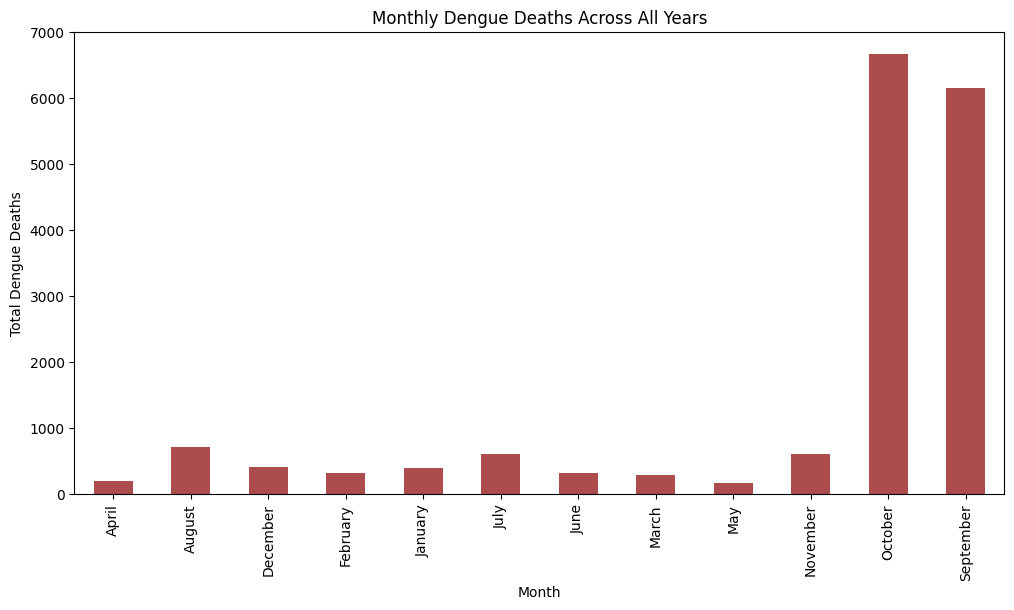

In [28]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum()

plt.figure(figsize=(12, 6))
monthly_deaths.plot(kind='bar', color='darkred', alpha=0.7)
plt.title('Monthly Dengue Deaths Across All Years')
plt.xlabel('Month')
plt.ylabel('Total Dengue Deaths')
plt.show()

<h1>INSIGHT #14. Yearly Dengue Case Trends in Region III</h1> 

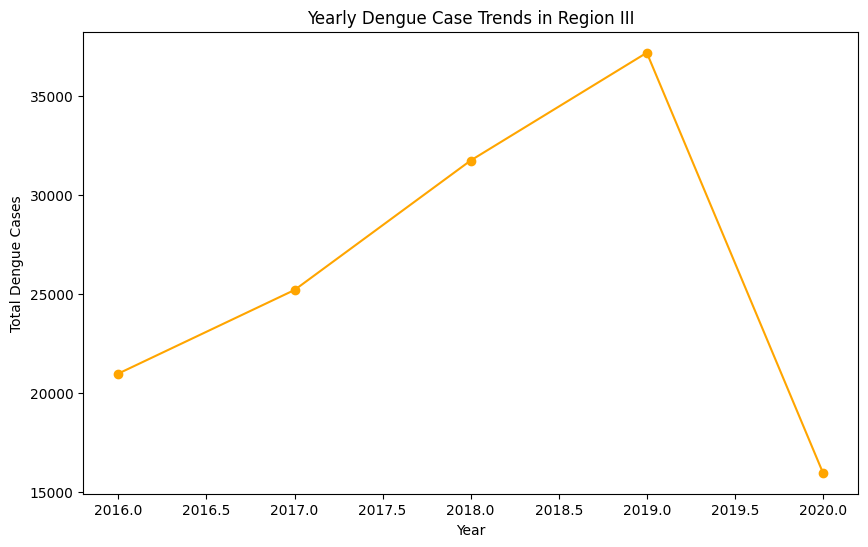

In [30]:
region_iii = dengue[dengue['Region'] == 'Region III']

region_iii_cases = region_iii.groupby('Year')['Dengue_Cases'].sum()

plt.figure(figsize=(10, 6))
region_iii_cases.plot(kind='line', marker='o', color='orange')
plt.title('Yearly Dengue Case Trends in Region III')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>INSIGHT #15. Proportion of Dengue Deaths to Cases Per Year</h1> 

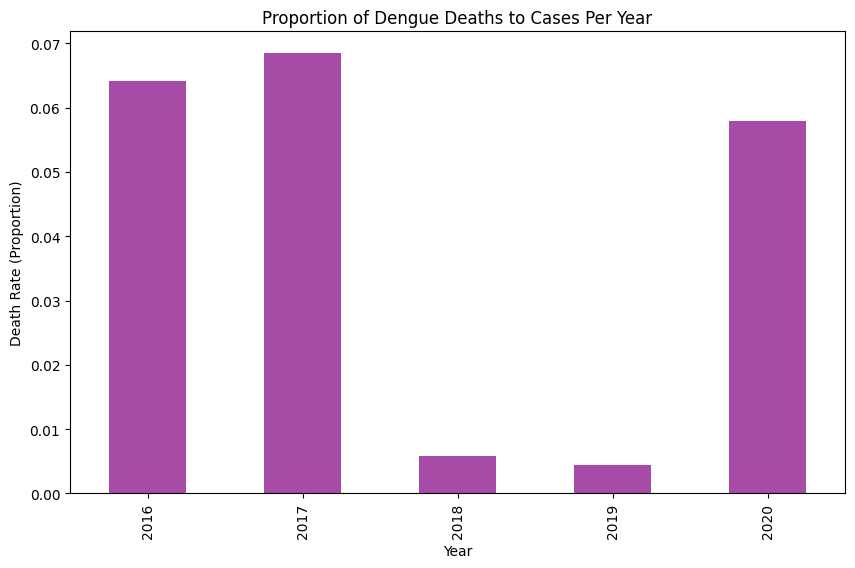

In [33]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
yearly_death_rate = dengue.groupby('Year')['Death_Rate'].mean()

plt.figure(figsize=(10, 6))
yearly_death_rate.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Proportion of Dengue Deaths to Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Death Rate (Proportion)')
plt.show()

<h1>INSIGHT #16. Heatmap of Monthly Cases by Year</h1> 

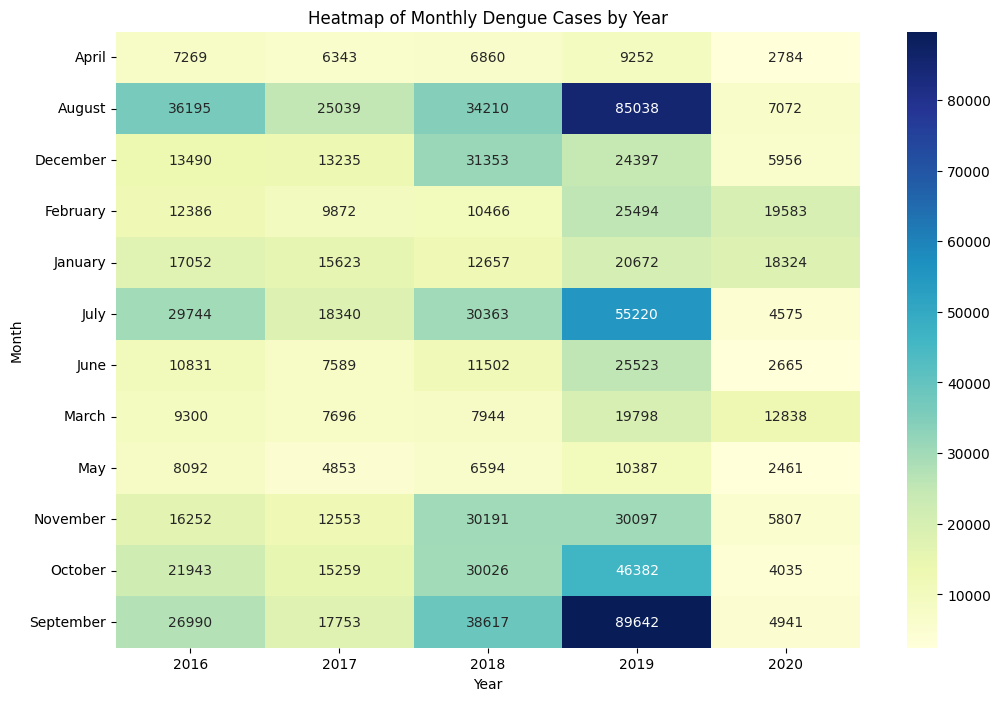

In [35]:
heatmap_data = dengue.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Monthly Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

<h1>INSIGHT #17. Top 5 Regions with Highest Death Rates</h1> 

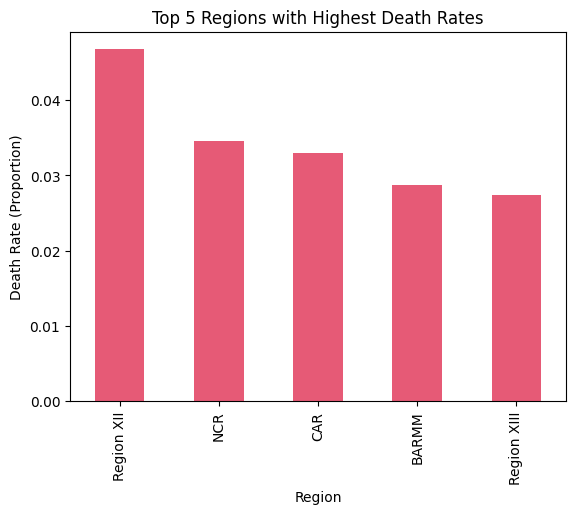

In [37]:
region_death_rate = dengue.groupby('Region').apply(lambda x: x['Dengue_Deaths'].sum() / x['Dengue_Cases'].sum())
top_regions_death_rate = region_death_rate.sort_values(ascending=False).head(5)

top_regions_death_rate.plot(kind='bar', color='crimson', alpha=0.7)
plt.title('Top 5 Regions with Highest Death Rates')
plt.xlabel('Region')
plt.ylabel('Death Rate (Proportion)')
plt.show()

<h1>INSIGHT #18. Comparison of Cases and Deaths in Region IV-A</h1> 

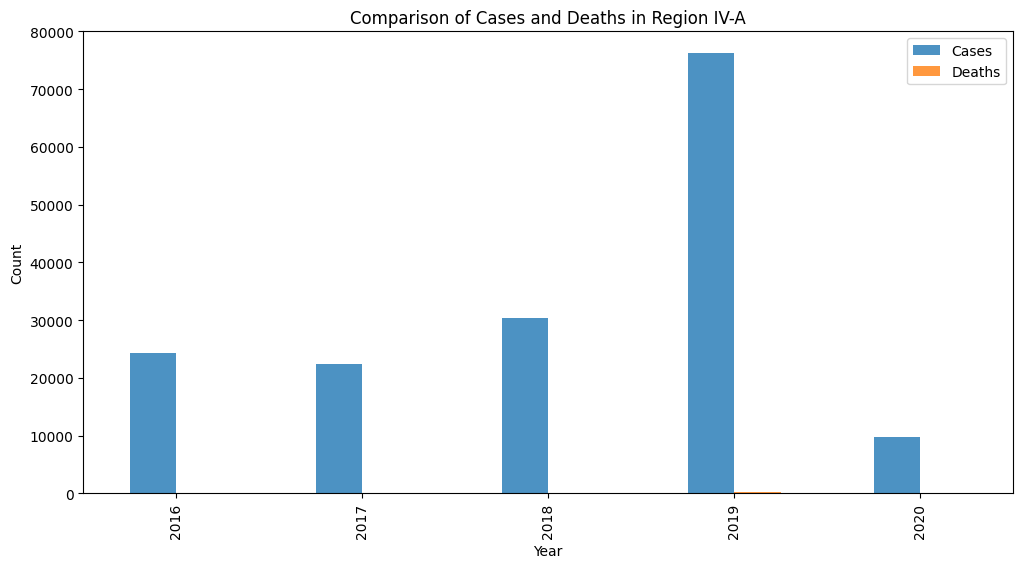

In [39]:
region_iv_a = dengue[dengue['Region'] == 'Region IV-A']

# Group by year and calculate total cases and deaths
region_iv_a_summary = region_iv_a.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()

# Plot comparison
region_iv_a_summary.plot(kind='bar', figsize=(12, 6), alpha=0.8)
plt.title('Comparison of Cases and Deaths in Region IV-A')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Cases', 'Deaths'])
plt.show()

<h1>INSIGHT #19. Total Dengue Cases in the Last Quarter (Oct-Dec)</h1> 

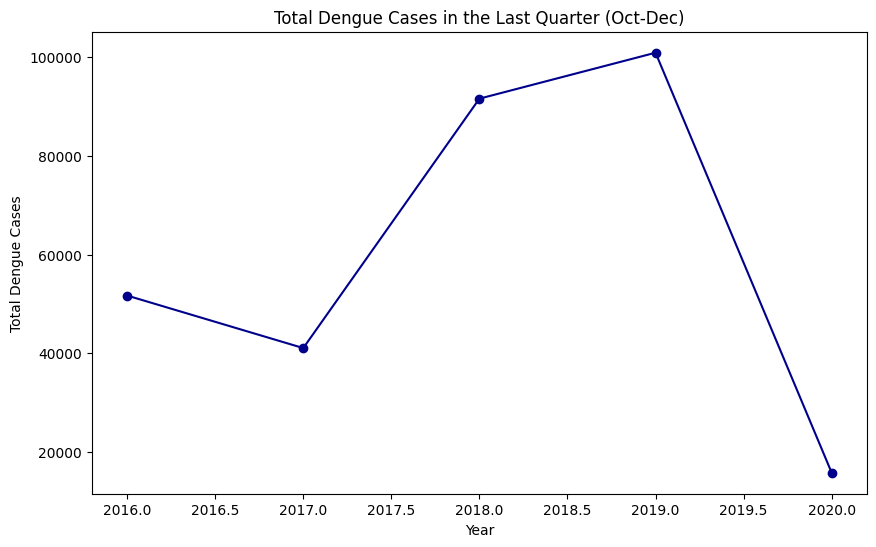

In [41]:
last_quarter_data = dengue[dengue['Month'].isin(['October', 'November', 'December'])]

last_quarter_cases = last_quarter_data.groupby('Year')['Dengue_Cases'].sum()

last_quarter_cases.plot(kind='line', marker='o', color='darkblue', figsize=(10, 6))
plt.title('Total Dengue Cases in the Last Quarter (Oct-Dec)')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>INSIGHT #20. Seasonal Trend Analysis: Wet vs Dry Season</h1> 

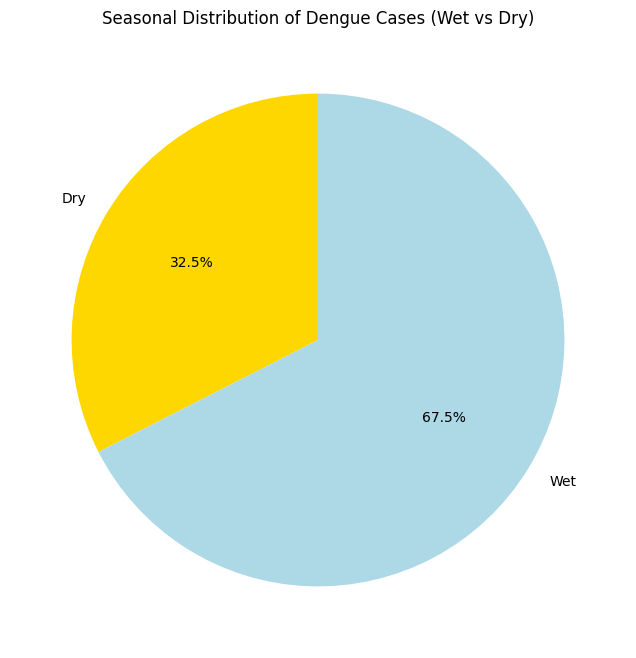

In [45]:
dengue['Season'] = dengue['Month'].apply(lambda x: 'Wet' if x in ['June', 'July', 'August', 'September', 'October', 'November'] else 'Dry')

seasonal_cases = dengue.groupby(['Season'])['Dengue_Cases'].sum()

seasonal_cases.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'], figsize=(8, 8))
plt.title('Seasonal Distribution of Dengue Cases (Wet vs Dry)')
plt.ylabel('')
plt.show()